## Summary 

Author: Trenton Bricken

Computing the Signal to Noise Ratio Optimal Hamming Distance.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
from scipy.sparse import csc_matrix, coo_matrix, csr_matrix
import pandas as pd
from scipy.integrate import quad
import time
from numpy import sqrt as sqrt
from SDM_Circ_Inter_Funcs import *
from Implementations_Associative_Memory import softmax

In [2]:
n = 64#1000
r = 2**n#10**18#2**n#1000000
m=60000#24

In [3]:
len(str(2**n))

20

# SNR Optimal

In [4]:
optimal_p = 1/(2*m*r)**(1/3)
print('Optimal p', optimal_p)
print('Optimal d', space_frac_to_hamm_dist(n, [optimal_p]))

Optimal p 7.673020240510549e-09
Optimal d [10]


# Memory Capacity Optimal

In [5]:
def memory_derivative(z,r):
    return 1/2*(z**4/(2*r**4*z**2 + r**3*z**6 + 2*sqrt(r**8*z**4 + r**7*z**8))**(1/3) + (2*r**4*z**2+ r**3*z**6 + 2*sqrt(r**8*z**4 + r**7 *z**8))**(1/3)/r**2 + z**2/r)

# z_score so the overall retrieval is 99%
prob_retrieval_of_whole_pattern = 0.5
prob_per_bit = prob_retrieval_of_whole_pattern**(1/n)
z_score_per_bit = norm.ppf(prob_per_bit)
print('z score per bit', z_score_per_bit)
#z = 2.33 # z-score

optimal_p =  memory_derivative(z_score_per_bit,r)
print('Optimal p', optimal_p)
print('Optimal d', space_frac_to_hamm_dist(n, [optimal_p]))

z score per bit 2.298313131383402
Optimal p 1.979930592478041e-13
Optimal d [5]


## Memory capacity derivation

In [56]:
from sympy import *
p, m, r, z = symbols('p m r z')
init_printing(use_unicode=True)


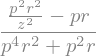

In [25]:
eq = ( (p*r)**2/z**2 - p*r )/( p**2*r + (p**2*r)**2 )
eq

0.00014563484775012504


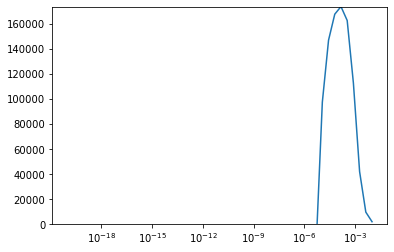

In [42]:
def memory_capacity_equation(z,r,p):
    return ( (p*r)**2/z**2 - p*r )/( p**2*r + (p**2*r)**2 ) +1

r = 1000000
z = 2.33
p = np.logspace(-20,-2)
res = og_eq(z,r,p)
plt.plot(p, res)
print(p[np.argmax(res)])
plt.xscale('log')
plt.ylim(bottom=0, top = np.max(res))

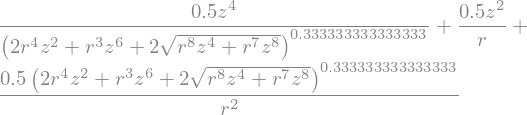

In [57]:
 1/2*(z**4/(2*r**4*z**2 + r**3*z**6 + 2*sqrt(r**8*z**4 + r**7*z**8))**(1/3) + (2*r**4*z**2+ r**3*z**6 + 2*sqrt(r**8*z**4 + r**7 *z**8))**(1/3)/r**2 + z**2/r)

In [58]:
# https://www.wolframalpha.com/input/?i=0+%3D++%28-2+r%5E2+x%5E3+%2B+3+r+x%5E2+z%5E2+%2B+z%5E2%29%2F%28x%5E2+z%5E2+%28r+x%5E2+%2B+1%29%5E2%29+solve+for+x


def wolf_deriv(z,r):
    return 1/2*(z**4/(2*r**4*z**2 + r**3*z**6 + 2*sqrt(r**8*z**4 + r**7*z**8))**(1/3) + (2*r**4*z**2+ r**3*z**6 + 2*sqrt(r**8*z**4 + r**7 *z**8))**(1/3)/r**2 + z**2/r)
z = 2.33
r = 1000000000

wolf_deriv(z, r)

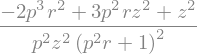

In [11]:
# derivative of memory equation: https://www.wolframalpha.com/input/?i=differentiate+%28+%28xr%29%5E2%2Fz%5E2+-+xr+%29%2F%28+x%5E2r+%2B+%28x%5E2r%29%5E2+%29++wrt+x
d1 = (-2 * r**2 * p**3 + 3*r*p**2 *z**2 + z**2)/(p**2 *z**2 *(r* p**2 + 1)**2)
d1

1e-08


array([ 1.00000000e+16,  5.68986603e+15,  3.23745754e+15,  1.84206997e+15,
        1.04811314e+15,  5.96362333e+14,  3.39322178e+14,  1.93069774e+14,
        1.09854115e+14,  6.25055202e+13,  3.55648040e+13,  2.02358974e+13,
        1.15139549e+13,  6.55128642e+12,  3.72759453e+12,  2.12095163e+12,
        1.20679331e+12,  6.86649400e+11,  3.90694404e+11,  2.22299867e+11,
        1.26485486e+11,  7.19681941e+10,  4.09483301e+10,  2.32981047e+10,
        1.32549143e+10,  7.53987906e+09,  4.28731288e+09,  2.43560309e+09,
        1.38062453e+09,  7.78531587e+08,  4.33544082e+08,  2.34095073e+08,
        1.16502334e+08,  4.43180502e+07, -3.35903493e+06, -3.83847179e+07,
       -6.69673790e+07, -9.11278292e+07, -1.09139918e+08, -1.16383456e+08,
       -1.08549422e+08, -8.67902204e+07, -5.91886253e+07, -3.49900346e+07,
       -1.84871879e+07, -9.02452295e+06, -4.18409690e+06, -1.87914494e+06,
       -8.28057107e+05, -3.60844775e+05])

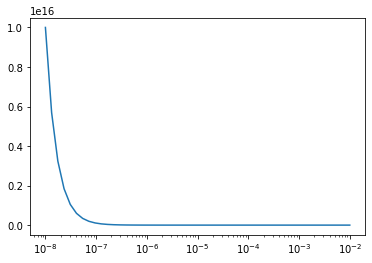

In [51]:
def derivative_eq(z,r,p):
    return (-2 * r**2 * p**3 + 3*r*p**2 *z**2 + z**2)/(p**2 *z**2 *(r* p**2 + 1)**2)

r = 1000000
z = 2.33
p = np.logspace(-8,-2)
res = derivative_eq(z,r,p)
plt.plot(p, res)
print(p[np.argmax(res)])
plt.xscale('log')
res
#plt.ylim(bottom=0, top = 100)

In [60]:
derivative_eq(z,r,1.39767608017285*10**(-6))

## SNR Derivation and misc

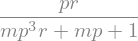

In [48]:

eq = ((p*r)/(1+p*m+p**3*m*r))
eq

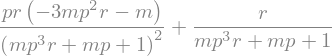

In [49]:

res = diff( eq , p)
res

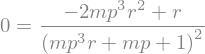

In [52]:
s = Eq(0, (r-2*p**3*m*r**2)/( (1+p*m+p**3 *m*r)**2 ))
s

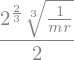

In [57]:
p_res = solve(s,p)[0]
p_res

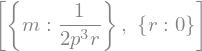

In [59]:
solve(res,p=p_res)

In [250]:

m=100
r=1000000

2**(2/3)*(1/(m*r))**(1/3)/2

0.0017099759466766974

In [163]:
binom.ppf(0.0035, 1000, 0.5)

457.0

In [158]:
np.epp(-1)/(np.epp(-1)+np.epp(3))

0.01798620996209156

In [63]:
27**(2/3)

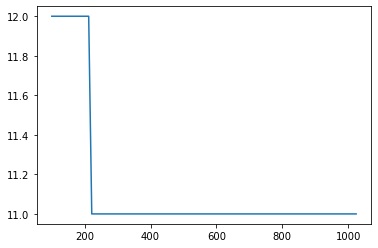

In [154]:
m=np.linspace(100,1024, 100)
rs = 2**64#np.linspace(10000, 10000000000000, 100)
pvals = 1/(2*m*rs)**(1/3)
hamm_vals = space_frac_to_hamm_dist(n, pvals)
plt.plot(m, hamm_vals)
#plt.yscale('log')